 **Importing dependencies**

In [1]:
#Utilities
import pandas as pd 
import numpy as np
import re
import string, time
from collections import defaultdict
!pip install pyspellchecker
from spellchecker import SpellChecker

#Visualization
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import plotly.graph_objects as go
import matplotlib

import matplotlib.patches as mpatches

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix


#Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer

import spacy

import category_encoders as ce
import gensim
from sklearn.decomposition import TruncatedSVD




# I’m going to use the first model of this family: Google’s Word2Vec (2013). Other popular Word Embedding models are Stanford’s GloVe (2014) and Facebook’s FastText (2016).
# https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794


**Importing dataset "Natural Language Processing with Disaster Tweets"**

In [2]:
#Description of the columns:

#id - a unique identifier for each tweet
#text - the text of the tweet
#location - the location the tweet was sent from (may be blank)
#keyword - a particular keyword from the tweet (may be blank)
#target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [2]:
#Importing dataset
dataset=pd.read_csv("https://raw.githubusercontent.com/kintis/VKR/main/train.csv")

pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

#Report the number of sentences
print('Number of sentences: {:,}\n'.format(dataset.shape[0]))

#Display 10 random rows from the dataset
dataset.sample(10, random_state=13)


Number of sentences: 7,613



,id,keyword,location,text,target
3738,5313,fire,NaN,Morganite Gemstone White Fire Opal 925 Sterling Silver Ring Size 6 R1354 http://t.co/hHpVSAtQXN http://t.co/D12r8XpShy,0
4809,6845,loud%20bang,NaN,need to work in an office I can bang all my fav Future jams out loud,0
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt: http://t.co/EDyfo6E2PU http://t.co/M5KxLPKFA1,1
1361,1963,burning%20buildings,Spying on your thoughts,@kshllcenterpri1 @Progress4Ohio burning down buildings what you mean like when you burnt down those black churches?,1
2773,3989,devastation,Washington DC,Fascinating pics from inside North Korea. Not propaganda not devastation - just people living life. http://t.co/E2Db...,0
6268,8956,storm,NaN,The Secrets Of The Storm Vortex The Lightning Catcher Book Û_ : http://t.co/OIyWrzL79Z .,0
1063,1534,bomb,"Bolton & Tewkesbury, UK",Hiroshima prepares to remember the day the bomb dropped http://t.co/oJHCGZXLSt,1
4142,5889,harm,"Queensland, Australia",Vanderbilt: First Do No Harm http://t.co/cCdx7CGlQW,0
5312,7585,outbreak,"Ile-Ife,Osun state, Nigeria",#News Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires'... ht...,1
2512,3608,desolation,[marvelÛ¢dragon ageÛ¢wicdiv],i decided to take a break from my emotional destruction to watch tangled then watch desolation of smaug,0


In [3]:
#Remove columns "location" from dataset that has a high proportion of missing values (>33%), column "id" due to unnecessary and "keyword"
data = dataset.drop(columns=['location', 'id', "keyword"])
#Display 10 random rows from the dataset
data.sample(10, random_state=13)

,text,target
3738,Morganite Gemstone White Fire Opal 925 Sterling Silver Ring Size 6 R1354 http://t.co/hHpVSAtQXN http://t.co/D12r8XpShy,0
4809,need to work in an office I can bang all my fav Future jams out loud,0
7600,Evacuation order lifted for town of Roosevelt: http://t.co/EDyfo6E2PU http://t.co/M5KxLPKFA1,1
1361,@kshllcenterpri1 @Progress4Ohio burning down buildings what you mean like when you burnt down those black churches?,1
2773,Fascinating pics from inside North Korea. Not propaganda not devastation - just people living life. http://t.co/E2Db...,0
6268,The Secrets Of The Storm Vortex The Lightning Catcher Book Û_ : http://t.co/OIyWrzL79Z .,0
1063,Hiroshima prepares to remember the day the bomb dropped http://t.co/oJHCGZXLSt,1
4142,Vanderbilt: First Do No Harm http://t.co/cCdx7CGlQW,0
5312,#News Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires'... ht...,1
2512,i decided to take a break from my emotional destruction to watch tangled then watch desolation of smaug,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


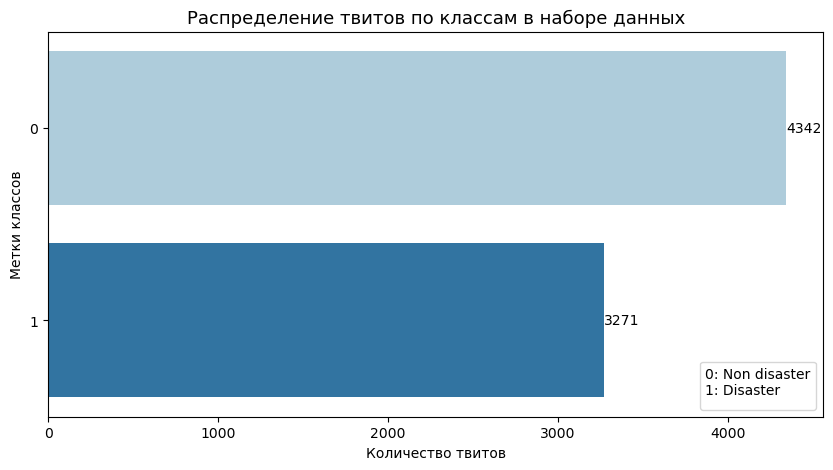

In [4]:
#Visualizing class distribution (1 is real disaster, 0 isn't real disaster)
plt.figure(figsize=(10,5))
ax = sns.countplot(data=data, y='target', palette='Paired')
ax.set_title('Распределение твитов по классам в наборе данных', fontsize=13)
ax.set_xlabel('Количество твитов')
ax.set_ylabel('Метки классов')
for label in ax.containers:
    ax.bar_label(label)
plt.legend(loc='lower right', title="0: Non disaster\n1: Disaster", ncol = 2)
plt.show()

**Splitting the Data**<br>
The data is divided into 2 sets of data:<br>

Training Data: The dataset upon which the model would be trained on. Contains 80% data.<br>
Test Data: The dataset upon which the model would be tested against. Contains20% data.<br>

In [5]:
TRAIN_SIZE=0.8
# Splits Dataset into Training and Testing set
train_data, test_data = train_test_split(data, test_size=1-TRAIN_SIZE,
                                         random_state=13) 
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

print(train_data.shape)
print(test_data.shape)

Train Data size: 6090
Test Data size 1523
(6090, 2)
(1523, 2)


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6090 entries, 5753 to 338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6090 non-null   object
 1   target  6090 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.7+ KB


In [7]:
#Comparison of sizes of training set, and test set
values = np.array([len(train_data), len(test_data)])
labels = ['Train set', 'Test set']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Распределение на обучающую и тестовую выборку"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

**Text normalization**

In [8]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

In [9]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


In [10]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


In [11]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


In [12]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.kaggle.com/c/nlp-getting-started/overview"> Natural Language Processing with Disaster Tweets </a>'

print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.kaggle.com/c/nlp-getting-started/overview"> Natural Language Processing with Disaster Tweets </a>
Output:  Natural Language Processing with Disaster Tweets 


In [13]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [15]:
# Substitution of Acronyms

acronyms_dict={"aka": "also known as",
"asap": "as soon as possible",
"brb": "be right back",
"btw": "by the way",
"dob": "date of birth",
"faq": "frequently asked questions",
"fyi": "for your information",
"idk": "i don't know",
"idc": "i don't care",
"iirc": "if i recall correctly",
"imo": "in my opinion",
"irl": "in real life",
"lmk": "let me know",
"lol": "laugh out loud",
"ngl": "not gonna lie",
"noyb": "none of your business",
"nvm": "never mind",
"ofc": "of course",
"omg": "oh my god",
"pfa": "please find attached",
"rofl": "rolling on the floor laughing",
"stfu": "shut the fuck up",
"tba": "to be announced",
"tbc": "to be continued",
"tbd": "to be determined",
"tbh": "to be honest",
"ttyl": "talk to you later",
"wtf": "what the fuck",
"wth": "what the heck"
}

# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [16]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [17]:
# Function to convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


In [18]:
# Substitution of Contractions
# Dictionary of contractions

contractions_url = 'https://raw.githubusercontent.com/kintis/VKR/main/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

print("Example: Original form of the contraction 'aren't' is '{}'".format(contractions_dict["aren't"]))

Example: Original form of the contraction 'aren't' is 'are not'


In [19]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


In [20]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [21]:
# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "he's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))

Input: he's doin' fine
Output: he is doing fine


In [22]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


In [32]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "I'm goinng therre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: I'm goinng therre
Output: I'm going there


In [23]:
# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


In [25]:
# Stemming
'''Stemming is the process of reducing the words to their root form or stem. 
    It reduces related words to the same stem even if the stem is not a dictionary word. 
    For example, the words introducing, introduced, introduction reduce to a common word introduce. 
    However, the process often produces stems that are not actual words.'''
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


In [26]:
# Lemmatization
import spacy
'''The stems introduc, lemmat and improv are not actual words. Lemmatization offers a more 
    sophisticated approach by utilizing a corpus to match root forms of the words. 
    Unlike stemming, it uses the context in which a word is being used.'''
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


In [27]:
# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


In [29]:
# Retainment of Relevant Parts of Speech

'''The parts of speech provide a great tool to select a subset of words that are more likely to contribute in the classification procedure
    and discard the rest to avoid noise. The idea is to select a number of parts of speech that are important to the context of the problem.
    Then we partition the words in a given text into several subsets corresponding to each part of speech and keep only those subsets corresponding
    to the selected parts of speech.'''
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

# For an extensive list of part-of-speech tags, see the https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


In [30]:
# Removal of Additional Stop Words¶
'''Analyzing the data, we observe that several unnecessary words, which are not included in the ready-made set of stop words,
 keep appearing in the text corpus. We discard these words to remove noise in the classification procedure.'''

# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

**Clean of text**

In [33]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_html(text)
    text = remove_punctuation(text)
  
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: combine function function apply product description httpsenwikipediaorgwikitextnormalization


**Preprocess train data**

In [33]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_html(text)
    text = remove_punctuation(text)
  
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    #text = remove_stopwords(text)
    text = pyspellchecker(text)
    #text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    #text = keep_pos(text)
    #text = remove_additional_stopwords(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: we shall combine all functions into single function apply on product descriptions httpsenwikipediaorgwikitextnormalization


In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

# Implementing text normalization (partly)
train_data_clean, test_data_clean = pd.DataFrame(), pd.DataFrame()

train_data_clean['clean_text'] = train_data['text'].progress_apply(text_normalizer)
test_data_clean['clean_text'] = test_data['text'].progress_apply(text_normalizer)

train_data_clean['target'] = train_data['target']
test_data_clean['label'] = test_data['target']

train_data_clean.head()

In [ ]:
test_data_clean.rename(columns={'label':'target'}, inplace=True)

In [ ]:
test_data_clean.head()

In [ ]:
train_data_clean.to_csv('train_data_clean.csv', encoding='utf-8')


In [101]:
test_data_clean.to_csv('test_data_clean.csv', encoding='utf-8')

In [35]:
# Let's take a look at the updated text
train_data['text'][30:40]

4927                                      #TBT to that time my best friend and I panicked at the disco. https://t.co/htpqvoHtUd
4750    NWS says thunderstorms with deadly lightning will move across the Black Hills this evening. That assumes there's a s...
2744    Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... ht...
4474                                                                         @minhazmerchant Great job done by village hostages
2617    Russian authorities to take account of petition against destruction of sanctioned food: Vladimir Putin's press... ht...
1540    Bomb Crash Loot Riot Emergency Pipe Bomb Nuclear Chemical Spill Gas Ricin Leak Violence Drugs Cartel Cocaine Marijua...
366                                      You da One \n\n#MTVSummerStar #VideoVeranoMTV  #MTVHottest Britney Spears Lana Del Rey
4536    #WakeUpFlorida... #Floridians more likely to be killed/injured by a #TrophyHunt killer's gun tha

In [34]:
train_data["clean_text"] = train_data["text"].apply(convert_to_lowercase).apply(convert_contractions)
train_data["clean_tokens"] = train_data["clean_text"].apply(regexp.tokenize)


test_data["clean_text"] = test_data["text"].apply(convert_to_lowercase).apply(convert_contractions)
test_data["clean_tokens"] = test_data["clean_text"].apply(regexp.tokenize)

In [35]:
train_data['text'][30:40]

4927                                      #TBT to that time my best friend and I panicked at the disco. https://t.co/htpqvoHtUd
4750    NWS says thunderstorms with deadly lightning will move across the Black Hills this evening. That assumes there's a s...
2744    Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a... ht...
4474                                                                         @minhazmerchant Great job done by village hostages
2617    Russian authorities to take account of petition against destruction of sanctioned food: Vladimir Putin's press... ht...
1540    Bomb Crash Loot Riot Emergency Pipe Bomb Nuclear Chemical Spill Gas Ricin Leak Violence Drugs Cartel Cocaine Marijua...
366                                      You da One \n\n#MTVSummerStar #VideoVeranoMTV  #MTVHottest Britney Spears Lana Del Rey
4536    #WakeUpFlorida... #Floridians more likely to be killed/injured by a #TrophyHunt killer's gun tha

**Word2VecModel**

In the context of natural language processing (NLP), word embeddings are used for representing a word in terms of a real-valued vector that encodes the meaning of the word such that the words that are close in the vector space are expected to be similar in meaning. It can capture the context of a word in a document, as well as identify semantic and syntactic similarity and other contextual relations with other words in the document.

Word2Vec is a specific word-embedding technique that uses a neural network model to learn word associations from a reasonably large corpus of text. After training, the model can detect similar words and recommend words to complete a partial sentence. As its name suggests, word2vec maps each distinct word to a vector, which is assigned in such a way that the level of semantic similarity between words is indicated by a simple mathematical operation on the vectors that the words are mapped to (for instance, the cosine similarity between the vectors).

In [37]:
# Loading the pre-trained Word2Vec model
word2vec_path = ".//GoogleNews-vectors-negative300.bin//GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary = True)

In [38]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)

In [39]:
def plot_embedding(X, y):
    truncated_SVD = TruncatedSVD(n_components = 2)
    truncated_SVD.fit(X)
    scores = truncated_SVD.transform(X)
    color_mapper = {label:idx for idx, label in enumerate(set(y))}
    color_column = [color_mapper[label] for label in y]
    colors = ['red', 'blue']
        
    plt.scatter(scores[:, 0], scores[:, 1], s = 8, alpha = 0.8, c = y, cmap = matplotlib.colors.ListedColormap(colors))
    red_patch = mpatches.Patch(color = 'red', label = 'Disaster')
    blue_patch = mpatches.Patch(color = 'blue', label = 'Non disaster')
  
    plt.legend(handles = [red_patch, blue_patch], prop = {"size": 12})

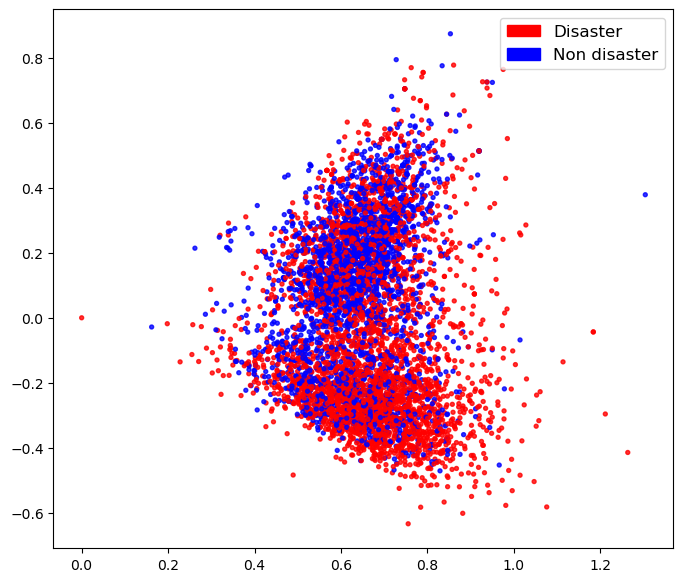

In [40]:
X_train_embed = get_word2vec_embeddings(word2vec, train_data["clean_tokens"])
X_test_embed = get_word2vec_embeddings(word2vec, test_data["clean_tokens"])

y_train = train_data['target'].tolist()
y_test = test_data['target'].tolist()

fig = plt.figure(figsize=(8, 7))          
plot_embedding(X_train_embed, y_train)
plt.show()

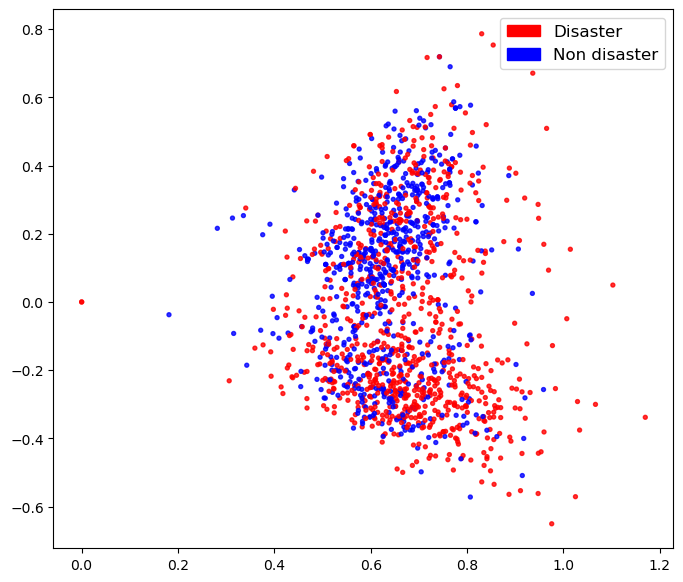

In [41]:
fig = plt.figure(figsize=(8, 7))          
plot_embedding(X_test_embed, y_test)
plt.show()

In [42]:
# Converting to Compressed Sparse Row matrix
X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

**Machine learning models**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import optuna
from sklearn.preprocessing import MaxAbsScaler

In [44]:
#Initialize a scaler to normalize the features
scaler = MaxAbsScaler()

#Test options and evaluation metric
num_folds = 5
seed = 13
scoring = 'accuracy'

In [48]:
#Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('KN', KNeighborsClassifier(n_jobs=-1)))
#models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_jobs=-1)))
models.append(('XGB', XGBClassifier(n_jobs=-1)))
models.append(('PA', PassiveAggressiveClassifier(n_jobs=-1)))


In [47]:
#w2v
results_w2v = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_w2v, y_train, cv=kfold, scoring=scoring, error_score='raise')
    results_w2v.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.798358 (0.004173)
KN: 0.777504 (0.010202)
SVM: 0.822167 (0.005843)
DT: 0.674713 (0.008633)
RF: 0.793760 (0.004509)
XGB: 0.802299 (0.009885)
PA: 0.755501 (0.021836)


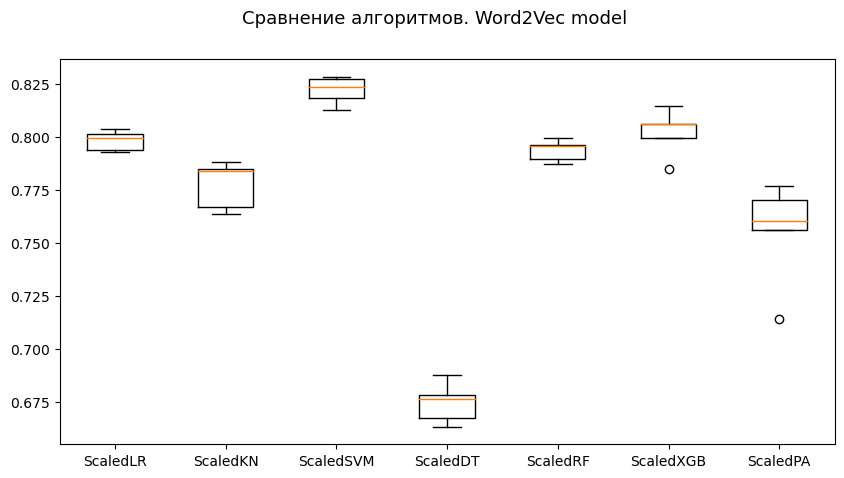

In [56]:
#Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Сравнение алгоритмов. Word2Vec model', fontsize=13)
ax = fig.add_subplot(111)
plt.boxplot(results_w2v)
ax.set_xticklabels(names)
plt.show()

In [53]:
#Standardize the dataset
#w2v
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MaxAbsScaler()),('LR', LogisticRegression(n_jobs=-1))])))
pipelines.append(('ScaledKN', Pipeline([('Scaler', MaxAbsScaler()),('KN', KNeighborsClassifier(n_jobs=-1))])))
#pipelines.append(('ScaledGNB', Pipeline([('Scaler', MinMaxScaler()),('GNB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MaxAbsScaler()),('SVM', SVC())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', MaxAbsScaler()),('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MaxAbsScaler()),('RF', RandomForestClassifier(n_jobs=-1))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', MaxAbsScaler()),('XGB', XGBClassifier(n_jobs=-1))])))
pipelines.append(('ScaledPA', Pipeline([('Scaler', MaxAbsScaler()),('PA', PassiveAggressiveClassifier(n_jobs=-1))])))
results_w2v_s = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_w2v, y_train, cv=kfold, scoring=scoring)
    results_w2v_s.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.793432 (0.007936)
ScaledKN: 0.770608 (0.012683)
ScaledSVM: 0.819376 (0.008028)
ScaledDT: 0.680788 (0.005930)
ScaledRF: 0.791626 (0.003499)
ScaledXGB: 0.802299 (0.009885)
ScaledPA: 0.718391 (0.035313)


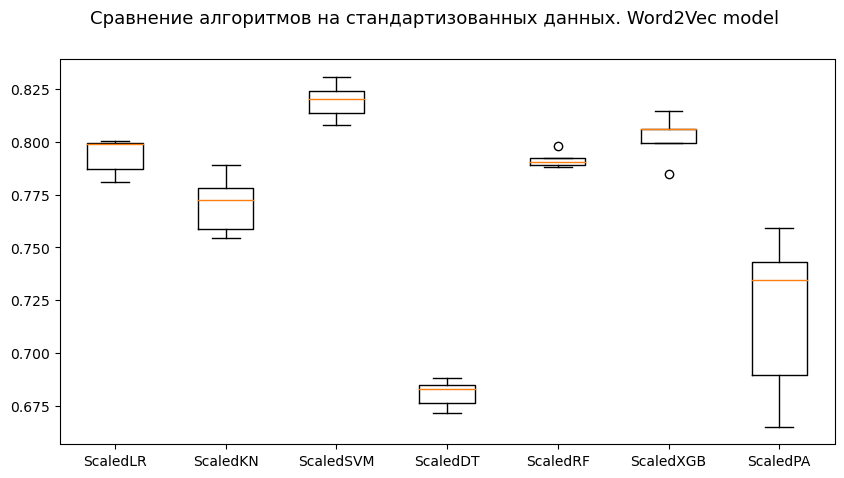

In [58]:
#Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Сравнение алгоритмов на стандартизованных данных. Word2Vec model', fontsize=13)
ax = fig.add_subplot(111)
plt.boxplot(results_w2v_s)
ax.set_xticklabels(names)
plt.show()

In [54]:
print("Optuna Version : {}".format(optuna.__version__))

Optuna Version : 3.1.1


**LogisticRegression (Word2Vec)**

In [59]:
#w2v model
#LogisticRegression

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

#Define the hyperparameters to be optimized
def objective(trial):
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    C = trial.suggest_float("C", 1.0, 10.0, log=True)
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])

    #Define the logistic regression model with the hyperparameters
    lr_w2v = LogisticRegression(penalty=penalty, C=C, solver=solver)


    # Perform kFold cross-validation and return the mean validation score
    scores = cross_val_score(lr_w2v, X_train_w2v, y_train, cv=kfold, scoring=scoring).mean()
    return scores

%time
#Run the optimization
study_lr = optuna.create_study(direction="maximize", study_name="LR_W2V")
study_lr.optimize(objective, n_trials=50, n_jobs=-1,show_progress_bar=True)

#Print best parametrs
print("Best Params LR_W2V: {}".format(study_lr.best_params))
print("\nBest Accuracy LR_W2V: {}".format(study_lr.best_value))


#Train the logistic regression model with the optimized hyperparameters
best_params_lr = study_lr.best_params
lr_w2v = LogisticRegression(**best_params_lr, n_jobs=-1)
lr_w2v.fit(X_train_w2v, y_train)


#Evaluate the performance of the model on the testing set
predictions_lr = lr_w2v.predict(X_test_w2v)

[I 2023-06-01 14:54:31,272] A new study created in memory with name: LR_W2V


CPU times: total: 0 ns
Wall time: 0 ns


c:\Users\Iuliia\miniconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/50 [00:00<?, ?it/s]

[I 2023-06-01 14:54:33,580] Trial 3 finished with value: 0.7981937602627257 and parameters: {'penalty': 'l2', 'C': 1.4762929071328932, 'solver': 'liblinear'}. Best is trial 3 with value: 0.7981937602627257.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:34,126] Trial 8 finished with value: 0.7950738916256157 and parameters: {'penalty': 'l2', 'C': 3.509962360140444, 'solver': 'liblinear'}. Best is trial 3 with value: 0.7981937602627257.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:34,585] Trial 7 finished with value: 0.7958949096880132 and parameters: {'penalty': 'l2', 'C': 7.719995065579729, 'solver': 'liblinear'}. Best is trial 3 with value: 0.7981937602627257.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\I

[I 2023-06-01 14:54:36,245] Trial 18 finished with value: 0.7970443349753695 and parameters: {'penalty': 'l2', 'C': 1.3435033535076197, 'solver': 'liblinear'}. Best is trial 3 with value: 0.7981937602627257.
[I 2023-06-01 14:54:36,565] Trial 12 finished with value: 0.7916256157635468 and parameters: {'penalty': 'l1', 'C': 1.1268803679042307, 'solver': 'liblinear'}. Best is trial 3 with value: 0.7981937602627257.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:38,038] Trial 19 finished with value: 0.7981937602627258 and parameters: {'penalty': 'l2', 'C': 1.447511476076564, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:38,269] Trial 20 finished with value: 0.7962233169129721 and parameters: {'penalty': 'l2', 'C': 2.0882203739298766, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\I

[I 2023-06-01 14:54:39,187] Trial 2 finished with value: 0.7929392446633826 and parameters: {'penalty': 'l1', 'C': 2.970884350842069, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\I

[I 2023-06-01 14:54:43,707] Trial 0 finished with value: 0.7958949096880132 and parameters: {'penalty': 'l2', 'C': 2.770381245219947, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:44,190] Trial 13 finished with value: 0.7962233169129721 and parameters: {'penalty': 'l2', 'C': 3.2813099777006154, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:44,298] Trial 1 finished with value: 0.7957307060755336 and parameters: {'penalty': 'l2', 'C': 4.324810096354699, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:44,387] Trial 17 finished with value: 0.797208538587849 and parameters: {'penalty': 'l2', 'C': 1.8707715756177832, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:44,448] Trial 10 finished with value: 0.7958949096880132 and parameters: {'penalty': 'l2', 'C': 3.744501379172408, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:44,671] Trial 5 finished with value: 0.7963875205254516 and parameters: {'penalty': 'l2', 'C': 2.460722551270243, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\I

[I 2023-06-01 14:54:46,595] Trial 16 finished with value: 0.7955665024630543 and parameters: {'penalty': 'l2', 'C': 3.9858970782270187, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:48,372] Trial 14 finished with value: 0.7929392446633825 and parameters: {'penalty': 'l1', 'C': 2.271210731539993, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:48,633] Trial 4 finished with value: 0.7932676518883415 and parameters: {'penalty': 'l1', 'C': 2.0607748003568016, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:48,665] Trial 15 finished with value: 0.7932676518883415 and parameters: {'penalty': 'l1', 'C': 9.136452480932418, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:49,058] Trial 6 finished with value: 0.79376026272578 and parameters: {'penalty': 'l1', 'C': 1.9393917941608447, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:49,134] Trial 9 finished with value: 0.7931034482758621 and parameters: {'penalty': 'l1', 'C': 9.671571243437194, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:49,320] Trial 27 finished with value: 0.7919540229885058 and parameters: {'penalty': 'l1', 'C': 1.0195497921365504, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:49,409] Trial 11 finished with value: 0.7937602627257799 and parameters: {'penalty': 'l1', 'C': 7.955846906400176, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:49,801] Trial 28 finished with value: 0.7919540229885056 and parameters: {'penalty': 'l1', 'C': 1.0425068237593533, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:49,947] Trial 22 finished with value: 0.7962233169129721 and parameters: {'penalty': 'l2', 'C': 2.0421919397369668, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:51,404] Trial 32 finished with value: 0.7980295566502462 and parameters: {'penalty': 'l2', 'C': 1.014594260585946, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:51,434] Trial 33 finished with value: 0.7980295566502462 and parameters: {'penalty': 'l2', 'C': 1.018585890796899, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:51,859] Trial 26 finished with value: 0.7929392446633826 and parameters: {'penalty': 'l1', 'C': 1.5946118864005523, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:52,214] Trial 35 finished with value: 0.7981937602627258 and parameters: {'penalty': 'l2', 'C': 1.0248916538547703, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:52,231] Trial 34 finished with value: 0.7980295566502462 and parameters: {'penalty': 'l2', 'C': 1.387459042191235, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:52,411] Trial 21 finished with value: 0.7957307060755336 and parameters: {'penalty': 'l2', 'C': 4.458712354450153, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:52,561] Trial 29 finished with value: 0.7929392446633826 and parameters: {'penalty': 'l1', 'C': 1.5888538241390264, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:52,644] Trial 36 finished with value: 0.7980295566502462 and parameters: {'penalty': 'l2', 'C': 1.5783469525392873, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:52,722] Trial 37 finished with value: 0.7980295566502462 and parameters: {'penalty': 'l2', 'C': 1.5605480406142074, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:53,048] Trial 38 finished with value: 0.797536945812808 and parameters: {'penalty': 'l2', 'C': 1.6002603894620047, 'solver': 'liblinear'}. Best is tri

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:53,382] Trial 23 finished with value: 0.7958949096880131 and parameters: {'penalty': 'l2', 'C': 4.414547993641121, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:54,346] Trial 41 finished with value: 0.7978653530377667 and parameters: {'penalty': 'l2', 'C': 1.5173903572046932, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:54,379] Trial 40 finished with value: 0.7980295566502462 and parameters: {'penalty': 'l2', 'C': 1.490219861492415, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:54,742] Trial 42 finished with value: 0.7973727422003283 and parameters: {'penalty': 'l2', 'C': 1.3638760210929795, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.
[I 2023-06-01 14:54:54,970] Trial 44 finished with value: 0.7968801313628899 and parameters: {'penalty': 'l2', 'C': 1.2703337659252898, 'solver': 'liblinear'}. Best is tri

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:55,985] Trial 31 finished with value: 0.7935960591133006 and parameters: {'penalty': 'l1', 'C': 1.566365601805199, 'solver': 'liblinear'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[I 2023-06-01 14:54:58,848] Trial 24 finished with value: 0.7929392446633825 and parameters: {'penalty': 'l1', 'C': 9.779167123369831, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.



[I 2023-06-01 14:54:59,050] Trial 25 finished with value: 0.7926108374384236 and parameters: {'penalty': 'l1', 'C': 1.026431869343353, 'solver': 'saga'}. Best is trial 19 with value: 0.7981937602627258.
Best Params LR_W2V: {'penalty': 'l2', 'C': 1.447511476076564, 'solver': 'liblinear'}

Best Accuracy LR_W2V: 0.7981937602627258


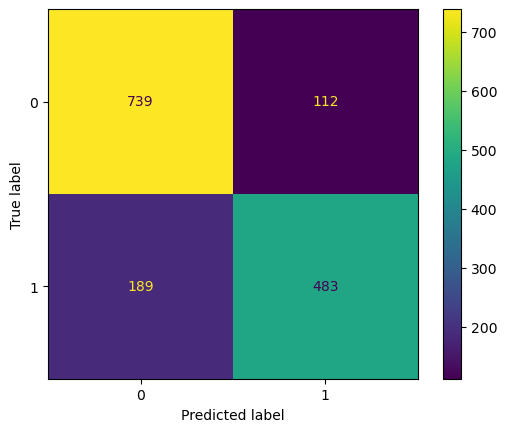

              precision    recall  f1-score   support

           0      0.796     0.868     0.831       851
           1      0.812     0.719     0.762       672

    accuracy                          0.802      1523
   macro avg      0.804     0.794     0.797      1523
weighted avg      0.803     0.802     0.801      1523



In [62]:
#Confusion matrix
cm=confusion_matrix(y_test, predictions_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_lr, digits=3))

**KNeighborsClassifier (Word2Vec)**

In [112]:

#w2v
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)


#Define the KNN model with the hyperparameters
knn_w2v = KNeighborsClassifier(n_neighbors=21, weights='uniform', metric='manhattan', algorithm='auto')

# Perform kFold cross-validation and return the mean validation score
scores = cross_val_score(knn_w2v, X_train_w2v, y_train, cv=kfold, scoring=scoring, n_jobs=-1).mean()

#Train the KNN model 
knn_w2v.fit(X_train_w2v, y_train)

#Evaluate the performance of the model on the testing set
predictions_knn = knn_w2v.predict(X_test_w2v)

print(scores)










0.7927750410509031


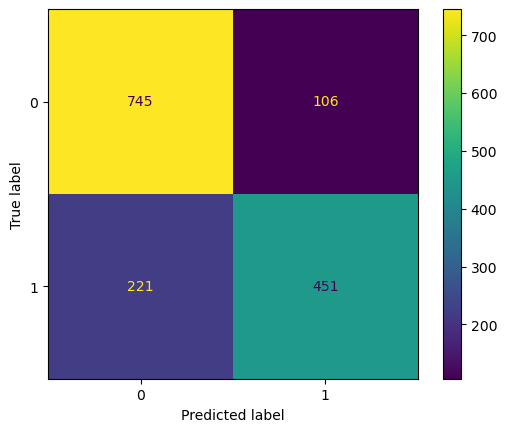

              precision    recall  f1-score   support

           0      0.771     0.875     0.820       851
           1      0.810     0.671     0.734       672

    accuracy                          0.785      1523
   macro avg      0.790     0.773     0.777      1523
weighted avg      0.788     0.785     0.782      1523



In [110]:
#Confusion matrix KN_W2V
cm=confusion_matrix(y_test, predictions_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_knn, digits=3))

**Support Vector Classification (w2v)**

In [46]:
#w2v
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

#Define the hyperparameters to be optimized
def objective(trial):
    C = trial.suggest_float('C', 0.1, 2.5, step=0.2)
    #gamma = trial.suggest_float('gamma', 0.01, 10, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])

    #Define the SVM model with the hyperparameters
    svc_w2v = SVC(C=C, kernel=kernel) # gamma=gamma


    # Perform kFold cross-validation and return the mean validation score
    scores = cross_val_score(svc_w2v, X_train_w2v, y_train, cv=kfold, scoring=scoring).mean()
    return scores

%time
#Run the optimization
study_svc = optuna.create_study(direction="maximize", study_name="SVC_W2V")
study_svc.optimize(objective, n_trials=20, n_jobs=-1,show_progress_bar=True)

#Print best parametrs
print("Best Params SVC_W2V: {}".format(study_svc.best_params))
print("\nBest Accuracy SVC_W2V: {}".format(study_svc.best_value))




#Train the SVM model with the optimized hyperparameters
best_params_svc = study_svc.best_params
svc_w2v = SVC(**best_params_svc)

svc_w2v.fit(X_train_w2v, y_train)


#Evaluate the performance of the model on the testing set
predictions_svc = svc_w2v.predict(X_test_w2v)

[I 2023-06-01 16:25:45,796] A new study created in memory with name: SVC_W2V


CPU times: total: 0 ns
Wall time: 2 ms


c:\Users\Iuliia\miniconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-06-01 16:27:50,048] Trial 11 finished with value: 0.6852216748768474 and parameters: {'C': 1.7000000000000002, 'kernel': 'sigmoid'}. Best is trial 11 with value: 0.6852216748768474.
[I 2023-06-01 16:28:05,619] Trial 10 finished with value: 0.6865353037766831 and parameters: {'C': 1.1, 'kernel': 'sigmoid'}. Best is trial 10 with value: 0.6865353037766831.
[I 2023-06-01 16:28:24,831] Trial 15 finished with value: 0.7978653530377668 and parameters: {'C': 2.1, 'kernel': 'linear'}. Best is trial 15 with value: 0.7978653530377668.
[I 2023-06-01 16:28:25,736] Trial 3 finished with value: 0.7978653530377668 and parameters: {'C': 2.1, 'kernel': 'linear'}. Best is trial 15 with value: 0.7978653530377668.
[I 2023-06-01 16:28:30,703] Trial 14 finished with value: 0.8236453201970443 and parameters: {'C': 1.3000000000000003, 'kernel': 'rbf'}. Best is trial 14 with value: 0.8236453201970443.
[I 2023-06-01 16:28:39,308] Trial 2 finished with value: 0.8073891625615763 and parameters: {'C': 2.30

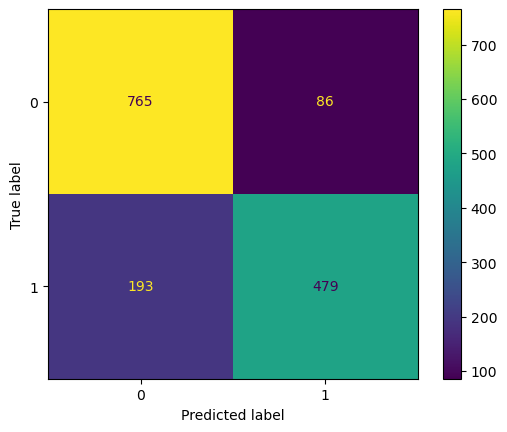

              precision    recall  f1-score   support

           0      0.799     0.899     0.846       851
           1      0.848     0.713     0.774       672

    accuracy                          0.817      1523
   macro avg      0.823     0.806     0.810      1523
weighted avg      0.820     0.817     0.814      1523



In [47]:
#Confusion matrix SVC_W2V
cm=confusion_matrix(y_test, predictions_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_svc, digits=3))

**RandomForestClassifier (Word2Vec)**

In [48]:
#w2v
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

#Define the hyperparameters to be optimized
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 50, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    #Define the RF model with the hyperparameters
    rf_w2v = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf) 



    # Perform kFold cross-validation and return the mean validation score
    scores = cross_val_score(rf_w2v, X_train_w2v, y_train, cv=kfold, scoring=scoring).mean()
    return scores

%time
#Run the optimization
study_RF = optuna.create_study(direction="maximize", study_name="RF_W2V")
study_RF.optimize(objective, n_trials=20, n_jobs=-1,show_progress_bar=True)

#Print best parametrs
print("Best Params RF_W2V: {}".format(study_RF.best_params))
print("\nBest Accuracy RF_W2V: {}".format(study_RF.best_value))




#Train the RF model with the optimized hyperparameters
best_params_rf = study_RF.best_params
rf_w2v = RandomForestClassifier(**best_params_rf, n_jobs=-1)
rf_w2v.fit(X_train_w2v, y_train)


#Evaluate the performance of the model on the testing set
predictions_rf = rf_w2v.predict(X_test_w2v)

[I 2023-06-01 16:35:33,961] A new study created in memory with name: RF_W2V


CPU times: total: 0 ns
Wall time: 0 ns


c:\Users\Iuliia\miniconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-06-01 16:36:28,971] Trial 4 finished with value: 0.7870279146141215 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 4 with value: 0.7870279146141215.
[I 2023-06-01 16:36:32,317] Trial 11 finished with value: 0.7779967159277504 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.7870279146141215.
[I 2023-06-01 16:37:36,617] Trial 0 finished with value: 0.7954022988505747 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7954022988505747.
[I 2023-06-01 16:39:16,682] Trial 15 finished with value: 0.797208538587849 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 15 with value: 0.797208538587849.
[I 2023-06-01 16:39:21,716] Trial 8 finished with value: 0.7965517241379311 and parameters

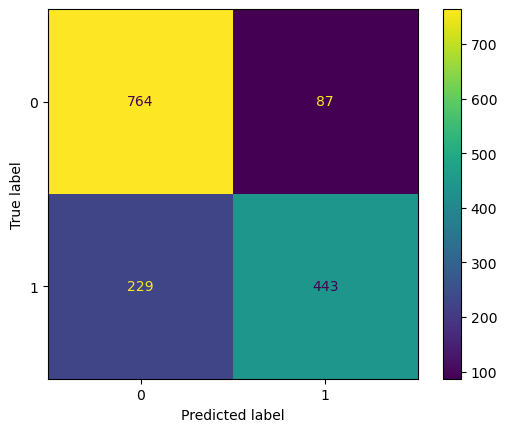

              precision    recall  f1-score   support

           0      0.769     0.898     0.829       851
           1      0.836     0.659     0.737       672

    accuracy                          0.793      1523
   macro avg      0.803     0.778     0.783      1523
weighted avg      0.799     0.793     0.788      1523



In [49]:
#Confusion matrix RF_W2V
cm=confusion_matrix(y_test, predictions_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_rf, digits=3))

**PassiveAggressiveClassifier (Word2Vec)**

In [50]:
#w2v
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

#Define the hyperparameters to be optimized
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    max_iter = trial.suggest_int('max_iter', 100, 1000, step=100)
    tol = trial.suggest_loguniform('tol', 1e-6, 1e-2)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])
    average = trial.suggest_categorical('average', [True, False])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    #Define the logistic regression model with the hyperparameters
    pa_w2v = PassiveAggressiveClassifier(C=C, fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, loss=loss, average=average, 
                                             class_weight=class_weight)


    # Perform kFold cross-validation and return the mean validation score
    scores = cross_val_score(pa_w2v, X_train_w2v, y_train, cv=kfold, scoring=scoring).mean()
    return scores

%time
#Run the optimization
study_pa = optuna.create_study(direction="maximize", study_name="PA_W2V")
study_pa.optimize(objective, n_trials=50, n_jobs=-1,show_progress_bar=True)

#Print best parametrs
print("Best Params PA_W2V: {}".format(study_pa.best_params))
print("\nBest Accuracy PA_W2V: {}".format(study_pa.best_value))


#Train the PAC model with the optimized hyperparameters
best_params_pa = study_pa.best_params
pa_w2v = PassiveAggressiveClassifier(**best_params_pa, n_jobs=-1)

pa_w2v.fit(X_train_w2v, y_train)


#Evaluate the performance of the model on the testing set

predictions_pa = pa_w2v.predict(X_test_w2v)


[I 2023-06-01 16:47:46,327] A new study created in memory with name: PA_W2V


CPU times: total: 0 ns
Wall time: 1.24 ms


c:\Users\Iuliia\miniconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:47,022] Trial 0 finished with value: 0.7193760262725781 and parameters: {'C': 2.5189529800216433e-05, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.0032986083354127073, 'loss': 'squared_hinge', 'average': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7193760262725781.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:47,319] Trial 2 finished with value: 0.6307060755336618 and parameters: {'C': 1129.2650058297368, 'fit_intercept': False, 'max_iter': 1000, 'tol': 0.0007910159848103023, 'loss': 'hinge', 'average': False, 'class_weight': None}. Best is trial 0 with value: 0.7193760262725781.
[I 2023-06-01 16:47:47,363] Trial 9 finished with value: 0.6791461412151067 and parameters: {'C': 314.3744684155697, 'fit_intercept': False, 'max_iter': 200, 'tol': 0.0010380102234023422, 'loss': 'squared_hinge', 'average': False, 'class_weight': None}. Best is trial 0 with value: 0.7193760262725781.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:47,642] Trial 4 finished with value: 0.7821018062397374 and parameters: {'C': 3.1827559227114883, 'fit_intercept': True, 'max_iter': 500, 'tol': 0.0014683156635301258, 'loss': 'squared_hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 4 with value: 0.7821018062397374.
[I 2023-06-01 16:47:47,710] Trial 14 finished with value: 0.7479474548440066 and parameters: {'C': 25536.809511032567, 'fit_intercept': False, 'max_iter': 500, 'tol': 2.2497127165644846e-06, 'loss': 'hinge', 'average': False, 'class_weight': None}. Best is trial 4 with value: 0.7821018062397374.
[I 2023-06-01 16:47:47,722] Trial 15 finished with value: 0.7912972085385879 and parameters: {'C': 1529.7104321618472, 'fit_intercept': False, 'max_iter': 200, 'tol': 1.8810756684715308e-05, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 15 with value: 0.7912972085385879.
[I 2023-06-01 16:47:47,778] Trial 8 finished with value: 0.7909688013136289 and parameters: {'C': 4

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:47,817] Trial 13 finished with value: 0.7839080459770116 and parameters: {'C': 7379.979529499195, 'fit_intercept': False, 'max_iter': 300, 'tol': 9.465110876796207e-06, 'loss': 'hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 15 with value: 0.7912972085385879.
[I 2023-06-01 16:47:48,259] Trial 16 finished with value: 0.7187192118226601 and parameters: {'C': 418.5161614092421, 'fit_intercept': False, 'max_iter': 900, 'tol': 5.637968750397914e-05, 'loss': 'squared_hinge', 'average': False, 'class_weight': None}. Best is trial 15 with value: 0.7912972085385879.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:48,585] Trial 18 finished with value: 0.7208538587848933 and parameters: {'C': 1.4705110726487187, 'fit_intercept': True, 'max_iter': 300, 'tol': 2.490490980233966e-05, 'loss': 'squared_hinge', 'average': False, 'class_weight': 'balanced'}. Best is trial 15 with value: 0.7912972085385879.
[I 2023-06-01 16:47:48,644] Trial 17 finished with value: 0.7037766830870279 and parameters: {'C': 3699.3566935702697, 'fit_intercept': True, 'max_iter': 300, 'tol': 4.9448680456823115e-05, 'loss': 'squared_hinge', 'average': False, 'class_weight': 'balanced'}. Best is trial 15 with value: 0.7912972085385879.
[I 2023-06-01 16:47:48,703] Trial 19 finished with value: 0.7142857142857142 and parameters: {'C': 1.7751316626289613, 'fit_intercept': True, 'max_iter': 100, 'tol': 0.0016358051521849196, 'loss': 'squared_hinge', 'average': False, 'class_weight': None}. Best is trial 15 with value: 0.7912972085385879.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:48,795] Trial 11 finished with value: 0.7362889983579639 and parameters: {'C': 26124.438744175808, 'fit_intercept': True, 'max_iter': 800, 'tol': 4.259115533851265e-05, 'loss': 'squared_hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 15 with value: 0.7912972085385879.
[I 2023-06-01 16:47:48,829] Trial 3 finished with value: 0.7988505747126436 and parameters: {'C': 0.02348580469771648, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.0012933120942604608, 'loss': 'hinge', 'average': False, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.7988505747126436.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:49,148] Trial 22 finished with value: 0.7441707717569787 and parameters: {'C': 1.0453744313208844, 'fit_intercept': True, 'max_iter': 300, 'tol': 0.00010786863892148804, 'loss': 'squared_hinge', 'average': False, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.7988505747126436.
[I 2023-06-01 16:47:49,259] Trial 23 finished with value: 0.7686371100164204 and parameters: {'C': 2.137075176732445, 'fit_intercept': False, 'max_iter': 500, 'tol': 0.0001099365511286569, 'loss': 'squared_hinge', 'average': False, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.7988505747126436.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 16:47:49,467] Trial 24 finished with value: 0.7835796387520525 and parameters: {'C': 256.1958711738338, 'fit_intercept': False, 'max_iter': 400, 'tol': 0.00831753516456782, 'loss': 'squared_hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.7988505747126436.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:49,722] Trial 21 finished with value: 0.7829228243021347 and parameters: {'C': 88.139031517773, 'fit_intercept': False, 'max_iter': 700, 'tol': 2.0609058637094185e-05, 'loss': 'hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.7988505747126436.
[I 2023-06-01 16:47:49,798] Trial 5 finished with value: 0.7908045977011493 and parameters: {'C': 0.016772551656799743, 'fit_intercept': True, 'max_iter': 100, 'tol': 0.00016751706229135852, 'loss': 'squared_hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 3 with value: 0.7988505747126436.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:50,061] Trial 25 finished with value: 0.7906403940886699 and parameters: {'C': 41871.99068492848, 'fit_intercept': False, 'max_iter': 100, 'tol': 1.8082438791487434e-06, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 3 with value: 0.7988505747126436.
[I 2023-06-01 16:47:50,148] Trial 26 finished with value: 0.7883415435139574 and parameters: {'C': 33.109959985870404, 'fit_intercept': False, 'max_iter': 700, 'tol': 1.2187463672695465e-06, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 3 with value: 0.7988505747126436.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optu

[I 2023-06-01 16:47:50,702] Trial 30 finished with value: 0.7927750410509031 and parameters: {'C': 0.012420591488430242, 'fit_intercept': False, 'max_iter': 700, 'tol': 0.0070411834114662425, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 3 with value: 0.7988505747126436.
[I 2023-06-01 16:47:50,739] Trial 31 finished with value: 0.7886699507389163 and parameters: {'C': 0.009697096046396365, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.006968833634454973, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 3 with value: 0.7988505747126436.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteratio

[I 2023-06-01 16:47:51,852] Trial 37 finished with value: 0.7863711001642036 and parameters: {'C': 0.009556962991018578, 'fit_intercept': False, 'max_iter': 600, 'tol': 0.009750382758822998, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 3 with value: 0.7988505747126436.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 16:47:52,759] Trial 27 finished with value: 0.8014778325123153 and parameters: {'C': 0.06552044786453472, 'fit_intercept': False, 'max_iter': 700, 'tol': 0.00019347127187769025, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 27 with value: 0.8014778325123153.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optu

[I 2023-06-01 16:47:53,454] Trial 34 finished with value: 0.8011494252873563 and parameters: {'C': 0.06758905432877942, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.0003556037843811279, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 27 with value: 0.8014778325123153.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 16:47:53,701] Trial 38 finished with value: 0.8009852216748768 and parameters: {'C': 0.05340438747137014, 'fit_intercept': False, 'max_iter': 600, 'tol': 0.0004307161654873582, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 27 with value: 0.8014778325123153.
[I 2023-06-01 16:47:53,814] Trial 35 finished with value: 0.8011494252873563 and parameters: {'C': 0.05399843581665783, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.0002321279848935763, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 27 with value: 0.8014778325123153.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:53,968] Trial 32 finished with value: 0.8018062397372742 and parameters: {'C': 0.026636003284800504, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.0003839757227992393, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 32 with value: 0.8018062397372742.
[I 2023-06-01 16:47:54,440] Trial 33 finished with value: 0.8022988505747126 and parameters: {'C': 0.025418180825830413, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.0002994821711886301, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to im

[I 2023-06-01 16:47:54,783] Trial 28 finished with value: 0.8022988505747126 and parameters: {'C': 0.014139272989556202, 'fit_intercept': False, 'max_iter': 700, 'tol': 0.0003435120340390387, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 16:47:55,074] Trial 39 finished with value: 0.8018062397372743 and parameters: {'C': 0.06874017221830181, 'fit_intercept': False, 'max_iter': 800, 'tol': 0.0003016331320812072, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This featu

[I 2023-06-01 16:47:55,590] Trial 42 finished with value: 0.7968801313628899 and parameters: {'C': 0.2298537721841546, 'fit_intercept': False, 'max_iter': 900, 'tol': 0.0003003956564636591, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.
[I 2023-06-01 16:47:55,761] Trial 29 finished with value: 0.8014778325123153 and parameters: {'C': 0.01816437867552372, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.0002493914901987693, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\56710310.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 16:47:55,853] Trial 40 finished with value: 0.8009852216748768 and parameters: {'C': 0.07820921363164281, 'fit_intercept': False, 'max_iter': 800, 'tol': 0.0004643571361383551, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.
[I 2023-06-01 16:47:55,919] Trial 36 finished with value: 0.8001642036124796 and parameters: {'C': 0.043221927163750035, 'fit_intercept': False, 'max_iter': 600, 'tol': 6.010767112098886e-06, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:47:56,235] Trial 43 finished with value: 0.7990147783251232 and parameters: {'C': 0.12792842429782975, 'fit_intercept': True, 'max_iter': 900, 'tol': 0.0002629266903297474, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.
[I 2023-06-01 16:47:56,837] Trial 41 finished with value: 0.7978653530377668 and parameters: {'C': 0.10842354292708122, 'fit_intercept': True, 'max_iter': 900, 'tol': 0.00036861622433002753, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:00,109] Trial 47 finished with value: 0.783415435139573 and parameters: {'C': 0.0011875038986262037, 'fit_intercept': True, 'max_iter': 900, 'tol': 0.0007279872787197106, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:00,501] Trial 45 finished with value: 0.787192118226601 and parameters: {'C': 0.001341018758403494, 'fit_intercept': True, 'max_iter': 900, 'tol': 0.0005530956408325946, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:00,998] Trial 49 finished with value: 0.7919540229885057 and parameters: {'C': 0.0020469393718562058, 'fit_intercept': True, 'max_iter': 800, 'tol': 0.0006057029469317141, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.
[I 2023-06-01 16:48:01,261] Trial 48 finished with value: 0.7866995073891626 and parameters: {'C': 0.0014125500164528944, 'fit_intercept': True, 'max_iter': 800, 'tol': 0.0006018225992654286, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:02,273] Trial 44 finished with value: 0.7908045977011494 and parameters: {'C': 0.0012350562236270702, 'fit_intercept': True, 'max_iter': 800, 'tol': 0.0003522934183418193, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.
[I 2023-06-01 16:48:02,573] Trial 46 finished with value: 0.7935960591133006 and parameters: {'C': 0.0013429825627671009, 'fit_intercept': True, 'max_iter': 800, 'tol': 0.000333877417792181, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:03,002] Trial 20 finished with value: 0.7201970443349753 and parameters: {'C': 1.4198817187869365e-05, 'fit_intercept': True, 'max_iter': 200, 'tol': 1.2226496852859446e-06, 'loss': 'hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:04,287] Trial 1 finished with value: 0.7711001642036125 and parameters: {'C': 1.8055795045363836e-05, 'fit_intercept': True, 'max_iter': 300, 'tol': 0.00018631596481012317, 'loss': 'squared_hinge', 'average': False, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.
[I 2023-06-01 16:48:04,844] Trial 10 finished with value: 0.7727422003284072 and parameters: {'C': 6.339550892646557e-05, 'fit_intercept': False, 'max_iter': 400, 'tol': 0.00032084772793337056, 'loss': 'squared_hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:05,764] Trial 6 finished with value: 0.774384236453202 and parameters: {'C': 0.00016577003322350043, 'fit_intercept': True, 'max_iter': 300, 'tol': 8.161203294929444e-06, 'loss': 'hinge', 'average': True, 'class_weight': None}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:09,339] Trial 12 finished with value: 0.7216748768472906 and parameters: {'C': 1.1180468102311163e-05, 'fit_intercept': False, 'max_iter': 400, 'tol': 3.0841976527276254e-06, 'loss': 'hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 33 with value: 0.8022988505747126.


c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\Iuliia\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[I 2023-06-01 16:48:20,734] Trial 7 finished with value: 0.7422003284072248 and parameters: {'C': 4.052725500521245e-05, 'fit_intercept': True, 'max_iter': 900, 'tol': 3.408515148195492e-05, 'loss': 'hinge', 'average': True, 'class_weight': 'balanced'}. Best is trial 33 with value: 0.8022988505747126.
Best Params PA_W2V: {'C': 0.025418180825830413, 'fit_intercept': True, 'max_iter': 700, 'tol': 0.0002994821711886301, 'loss': 'hinge', 'average': True, 'class_weight': None}

Best Accuracy PA_W2V: 0.8022988505747126


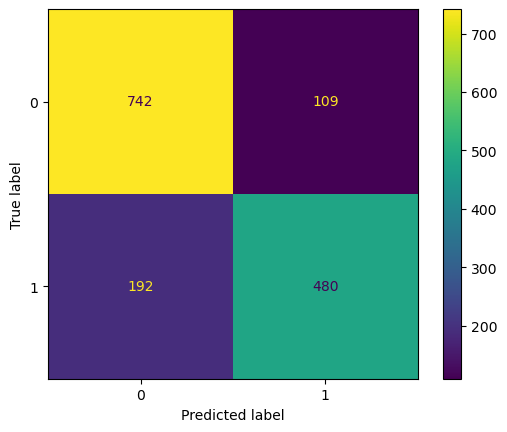

              precision    recall  f1-score   support

           0      0.794     0.872     0.831       851
           1      0.815     0.714     0.761       672

    accuracy                          0.802      1523
   macro avg      0.805     0.793     0.796      1523
weighted avg      0.803     0.802     0.800      1523



In [51]:
#Confusion matrix PA_W2V
cm=confusion_matrix(y_test, predictions_pa)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_pa, digits=3))

**XGBoost (Word2Vec)**

In [107]:
#w2v
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

#Define the hyperparameters to be optimized
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),

        #tree booster parametrs
        'gamma': trial.suggest_loguniform('gamma', 0.01, 10),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1.0, log=True),
        'tree_method': 'gpu_hist',
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
    
        #learning parametrs
        'objective': 'binary:logistic'
          
    }

    
    #Define the XGB model with the hyperparameters
    xgb_w2v = XGBClassifier(**params)

    # Perform kFold cross-validation and return the mean validation score
    scores = cross_val_score(xgb_w2v, X_train_w2v, y_train, cv=kfold, scoring=scoring).mean()
    return scores

%time
#Run the optimization
study_xgb = optuna.create_study(direction="maximize", study_name="XGB_W2V")
study_xgb.optimize(objective, n_trials=20, n_jobs=-1,show_progress_bar=True)

#Print best parametrs
print("Best Params XGB_W2V: {}".format(study_xgb.best_params))
print("\nBest Accuracy XGB_W2V: {}".format(study_xgb.best_value))


#Train the XGB model with the optimized hyperparameters
best_params_xgb = study_xgb.best_params
xgb_w2v = XGBClassifier(**best_params_xgb, n_jobs=-1)

xgb_w2v.fit(X_train_w2v, y_train)


#Evaluate the performance of the model on the testing set
predictions_xgb = xgb_w2v.predict(X_test_w2v)

[I 2023-06-01 18:09:30,723] A new study created in memory with name: XGB_W2V


CPU times: total: 0 ns
Wall time: 0 ns


c:\Users\Iuliia\miniconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\1180336832.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 18:10:06,471] Trial 3 finished with value: 0.7733990147783251 and parameters: {'n_estimators': 72, 'gamma': 7.693284774873104, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.9168808363283035, 'reg_lambda': 0.028985655420065086, 'reg_alpha': 0.0024431786258098808, 'colsample_bytree': 0.6447883097470749, 'learning_rate': 0.711549115823591}. Best is trial 3 with value: 0.7733990147783251.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\1180336832.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 18:10:08,138] Trial 13 finished with value: 0.7625615763546798 and parameters: {'n_estimators': 67, 'gamma': 5.983317315338759, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8286823188286772, 'reg_lambda': 0.17175090371983065, 'reg_alpha': 0.3844712210700271, 'colsample_bytree': 0.6455014689264368, 'learning_rate': 0.5731035772262566}. Best is trial 3 with value: 0.7733990147783251.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\1180336832.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 18:10:15,285] Trial 9 finished with value: 0.7860426929392447 and parameters: {'n_estimators': 120, 'gamma': 0.6056300521471185, 'max_depth': 1, 'min_child_weight': 8, 'subsample': 0.5166330207963881, 'reg_lambda': 0.02939297380962562, 'reg_alpha': 0.02609784157819278, 'colsample_bytree': 0.9534859295358513, 'learning_rate': 0.26926748386907595}. Best is trial 9 with value: 0.7860426929392447.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\1180336832.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 18:10:28,470] Trial 4 finished with value: 0.7817733990147783 and parameters: {'n_estimators': 107, 'gamma': 1.4258906214369849, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.9925520041811358, 'reg_lambda': 0.2562610992446809, 'reg_alpha': 0.30153642497520644, 'colsample_bytree': 0.6100079703005367, 'learning_rate': 0.6603971070862684}. Best is trial 9 with value: 0.7860426929392447.


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_42760\1180336832.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.



[I 2023-06-01 18:10:30,972] Trial 7 finished with value: 0.7729064039408866 and parameters: {'n_estimators': 110, 'gamma': 2.8494855478504504, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5090173857278188, 'reg_lambda': 0.0024416276377360294, 'reg_alpha': 0.12943530967168013, 'colsample_bytree': 0.8132023949146235, 'learning_rate': 0.4026958852395674}. Best is trial 9 with value: 0.7860426929392447.
[I 2023-06-01 18:10:42,255] Trial 2 finished with value: 0.7954022988505749 and parameters: {'n_estimators': 128, 'gamma': 5.217294623585134, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.9959963158047622, 'reg_lambda': 0.8287369473077255, 'reg_alpha': 0.035082098642247754, 'colsample_bytree': 0.8745324800697352, 'learning_rate': 0.1454448287804246}. Best is trial 2 with value: 0.7954022988505749.
[I 2023-06-01 18:11:00,848] Trial 16 finished with value: 0.7617405582922825 and parameters: {'n_estimators': 137, 'gamma': 7.617828699171484, 'max_depth': 7, 'min_child_weight': 

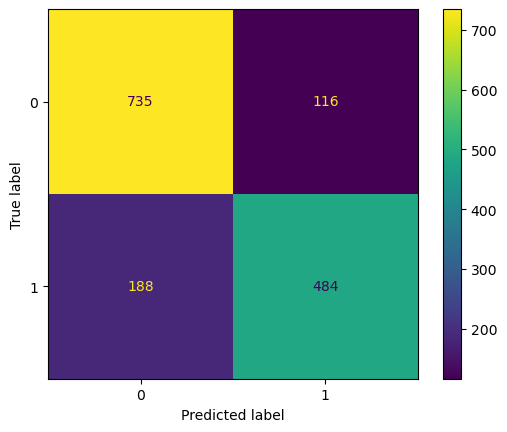

              precision    recall  f1-score   support

           0      0.796     0.864     0.829       851
           1      0.807     0.720     0.761       672

    accuracy                          0.800      1523
   macro avg      0.801     0.792     0.795      1523
weighted avg      0.801     0.800     0.799      1523



In [108]:
#Confusion matrix XGB_W2V
cm=confusion_matrix(y_test, predictions_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_xgb, digits=3))

**DecisionTreeClassifier (Word2vec)**

In [104]:
#w2v
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

#Define the hyperparameters to be optimized
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
       
          
    }

    
    #Define the DT model with the hyperparameters
    dt_w2v = DecisionTreeClassifier(**params)

    #Scale the data using MinMaxScaler
    #scaler = MinMaxScaler()
    #X_train_V12_scaled = scaler.fit_transform(X_train_V12)
    #X_test_scaled = scaler.transform(X_test_V12)

    # Perform kFold cross-validation and return the mean validation score
    scores = cross_val_score(dt_w2v, X_train_w2v, y_train, cv=kfold, scoring=scoring).mean()
    return scores

%time
#Run the optimization
study_DT = optuna.create_study(direction="maximize", study_name="DT_W2V")
study_DT.optimize(objective, n_trials=50, n_jobs=-1,show_progress_bar=True)

#Print best parametrs
print("Best Params DT_W2V: {}".format(study_DT.best_params))
print("\nBest Accuracy DT_W2V: {}".format(study_DT.best_value))


#Train the DT model with the optimized hyperparameters
best_params_DT = study_DT.best_params
dt_w2v = DecisionTreeClassifier(**best_params_DT)
#scaler = MinMaxScaler()
#X_train_V12_scaled = scaler.fit_transform(X_train_V12)
dt_w2v.fit(X_train_w2v, y_train)


#Evaluate the performance of the model on the testing set
#X_test_V12_scaled = scaler.transform(X_test_V12)
predictions_DT = dt_w2v.predict(X_test_w2v)

[I 2023-06-01 18:04:32,239] A new study created in memory with name: DT_W2V


CPU times: total: 0 ns
Wall time: 0 ns


c:\Users\Iuliia\miniconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/50 [00:00<?, ?it/s]

[I 2023-06-01 18:04:33,401] Trial 2 finished with value: 0.657471264367816 and parameters: {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.657471264367816.
[I 2023-06-01 18:04:33,854] Trial 6 finished with value: 0.6816091954022989 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 6 with value: 0.6816091954022989.
[I 2023-06-01 18:04:33,920] Trial 0 finished with value: 0.6924466338259442 and parameters: {'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.6924466338259442.
[I 2023-06-01 18:04:33,977] Trial 7 finished with value: 0.6850574712643678 and parameters: {'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6924466338259442.
[I 2023-06-01 18:04:33,995] Trial 11 finished with value: 0.67816091954023 and paramet

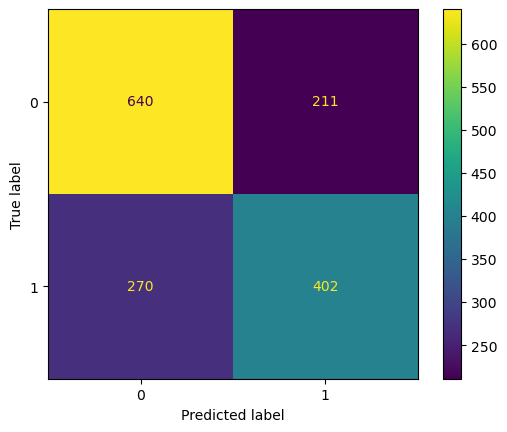

              precision    recall  f1-score   support

           0      0.703     0.752     0.727       851
           1      0.656     0.598     0.626       672

    accuracy                          0.684      1523
   macro avg      0.680     0.675     0.676      1523
weighted avg      0.682     0.684     0.682      1523



In [106]:
#Confusion matrix DT_W2V
cm=confusion_matrix(y_test, predictions_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()
print(classification_report(y_test, predictions_DT, digits=3))